In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
churndf = pd.read_csv('telecom_customer_churn.csv')
churndf.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [2]:
# Set lowercase and replace whitespace with underscore of Columns Header
churndf.rename(columns=str.lower, inplace=True)
churndf.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)

In [23]:
#Data Cleaning Step : Fill missing data based on other column

#Fill null values of Churn category and reason with None instead of null values
churndf['churn_category'] = churndf['churn_category'].fillna('None')
churndf['churn_reason'] = churndf['churn_reason'].fillna('None')

#Fill null values of Avg monthly distance long charges based on home phone services
avgm = (churndf['avg_monthly_long_distance_charges'].isnull()) & (churndf['phone_service'] == 'No')
churndf.loc[avgm, 'avg_monthly_long_distance_charges'] = 0

#Fill null values of Multiple lines based on home phone services
multiline = (churndf['multiple_lines'].isnull()) & (churndf['phone_service'] == 'No')
churndf.loc[multiline, 'multiple_lines'] = 0

#Fill null values of Internet type based on internet services
inettype = (churndf['internet_type'].isnull()) & (churndf['internet_service'] == 'No')
churndf.loc[inettype, 'internet_type'] = 'None'

#Fill null values of Internet type based on internet services
avggb = (churndf['avg_monthly_gb_download'].isnull()) & (churndf['internet_service'] == 'No')
churndf.loc[avggb, 'avg_monthly_gb_download'] = 0

#Fill null values of Online security based on internet services
on_sec = (churndf['online_security'].isnull()) & (churndf['internet_service'] == 'No')
churndf.loc[on_sec, 'online_security'] = 'No'

#Fill null values of Online backup based on internet services
on_back = (churndf['online_backup'].isnull()) & (churndf['internet_service'] == 'No')
churndf.loc[on_sec, 'online_backup'] = 'No'

#Fill null values of Device protection plan based on internet services
protect = (churndf['device_protection_plan'].isnull()) & (churndf['internet_service'] == 'No')
churndf.loc[protect, 'device_protection_plan'] = 'No'

#Fill null values of Premium tech support on internet services
support = (churndf['premium_tech_support'].isnull()) & (churndf['internet_service'] == 'No')
churndf.loc[support, 'premium_tech_support'] = 'No'

#Fill null values of Streaming tv based on internet services
tv = (churndf['streaming_tv'].isnull()) & (churndf['internet_service'] == 'No')
churndf.loc[tv, 'streaming_tv'] = 'No'

#Fill null values of Streaming movies based on internet services
movies = (churndf['streaming_movies'].isnull()) & (churndf['internet_service'] == 'No')
churndf.loc[movies, 'streaming_movies'] = 'No'

#Fill null values of Streaming music based on internet services
music = (churndf['streaming_music'].isnull()) & (churndf['internet_service'] == 'No')
churndf.loc[music, 'streaming_music'] = 'No'

#Fill null values of Unlimited data based on internet services
unlit = (churndf['unlimited_data'].isnull()) & (churndf['internet_service'] == 'No')
churndf.loc[unlit, 'unlimited_data'] = 'No'

#Check for columns that have null values
null_columns = churndf.columns[churndf.isnull().any()]
churndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customer_id                        7043 non-null   object 
 1   gender                             7043 non-null   object 
 2   age                                7043 non-null   int64  
 3   married                            7043 non-null   object 
 4   number_of_dependents               7043 non-null   int64  
 5   city                               7043 non-null   object 
 6   zip_code                           7043 non-null   int64  
 7   latitude                           7043 non-null   float64
 8   longitude                          7043 non-null   float64
 9   number_of_referrals                7043 non-null   int64  
 10  tenure_in_months                   7043 non-null   int64  
 11  offer                              7043 non-null   objec

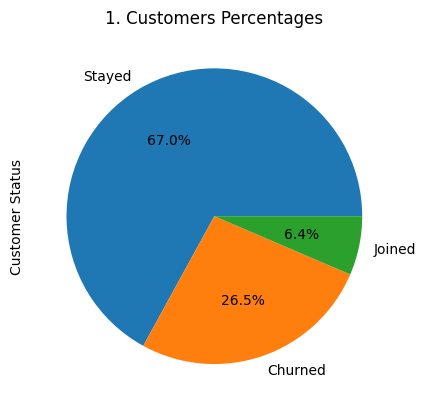

In [4]:
# 1. Find the percentages of customers in each customer category (churned, stayed, joined).
#Check and Show all customer status
status = churndf['customer_status'].count
perc = (churndf['customer_status'].value_counts()/churndf['customer_status'].count())*100
churndf['customer_status'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=False, ylabel='Customer Status' ,title='1. Customers Percentages')
plt.show()

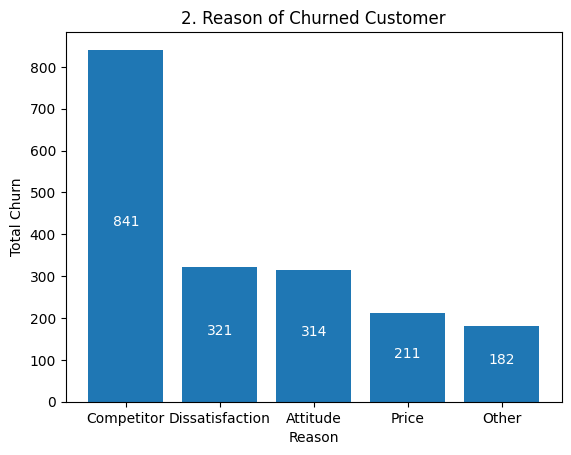

In [5]:
# 2. Show reason why most people churn
#Show only Churned Data
churned = churndf[churndf['churn_category'] != 'None']
# Group the data by the 'churn_category' column and count total churn data
counts = churned.groupby('churn_category')['churn_category'].count()
counts = counts.sort_values(ascending=False)

# Create the bar chart to show most churned customer
fig, ax = plt.subplots()
plt.bar(counts.index, counts.values)
plt.title('2. Reason of Churned Customer')
plt.xlabel('Reason')
plt.ylabel('Total Churn')
for i, v in enumerate(counts.values):
    ax.text(i, v/2, str(v), ha='center', color='white')
plt.show()

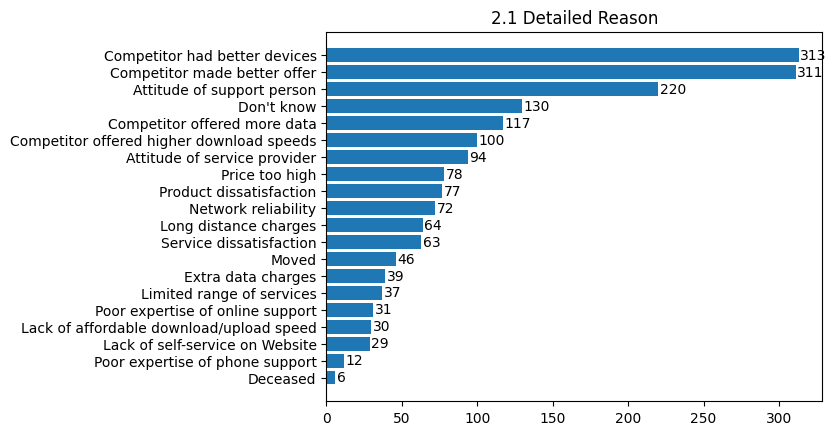

In [6]:
# 2.1 Show more detail about the reason why people churn
counts = churndf[churndf['churn_reason'] != 'None ']
counts = churned.groupby('churn_reason')['churn_reason'].count()
counts = counts.sort_values(ascending=True)
fig, ax = plt.subplots()
ax.barh(counts.index, counts.values)
plt.title('2.1 Detailed Reason')

for i, counts in enumerate(counts.values):
    ax.text(counts + 1, i, str(counts), va='center')
plt.show()

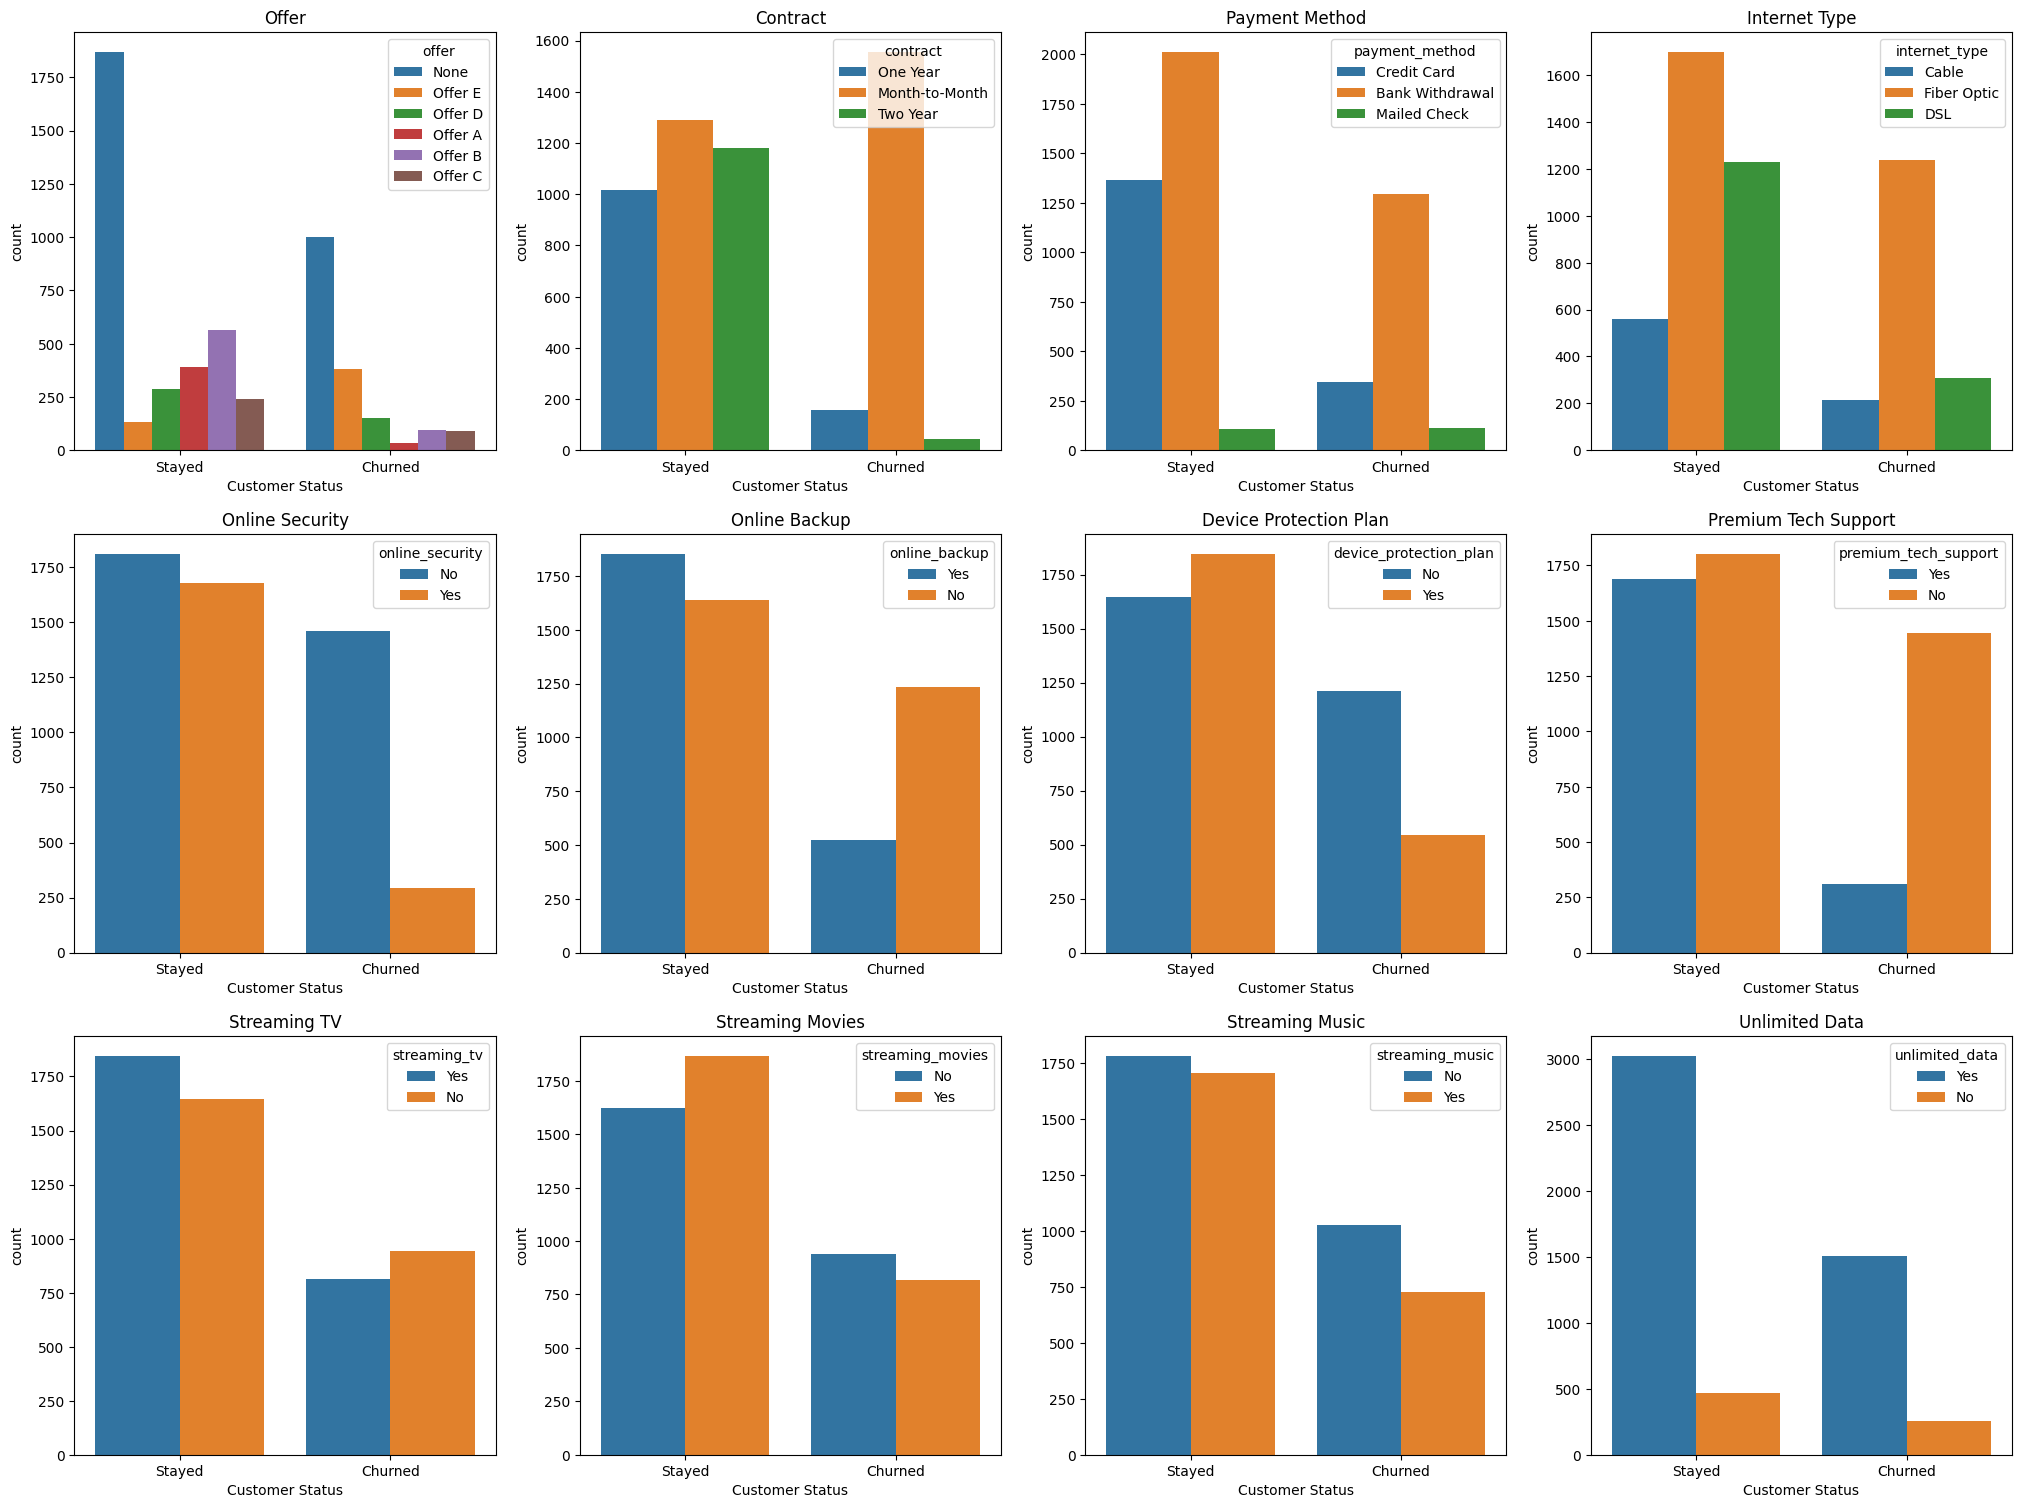

In [7]:
# 3. The profile of Churned and Stayed customer
churncat = churndf[(churndf['internet_type'] != 'None') &
                 (churndf['customer_status'] != 'Joined')]

offercust = ['offer','contract','payment_method','internet_type',
             'online_security','online_backup', 'device_protection_plan','premium_tech_support',
             'streaming_tv','streaming_movies','streaming_music','unlimited_data']

ofctitle = ['Offer','Contract','Payment Method','Internet Type',
            'Online Security','Online Backup', 'Device Protection Plan','Premium Tech Support',
            'Streaming TV','Streaming Movies','Streaming Music','Unlimited Data',]

plt.figure(figsize=(25,25))
for i, (col,title) in enumerate(zip(offercust,ofctitle)):
    ax = plt.subplot(4, 4, i+1)
    ax.set_title(f"{title}")
    
    ax = sns.countplot(x ="customer_status", hue = str(col), data = churncat)
    ax.set_xlabel('Customer Status')

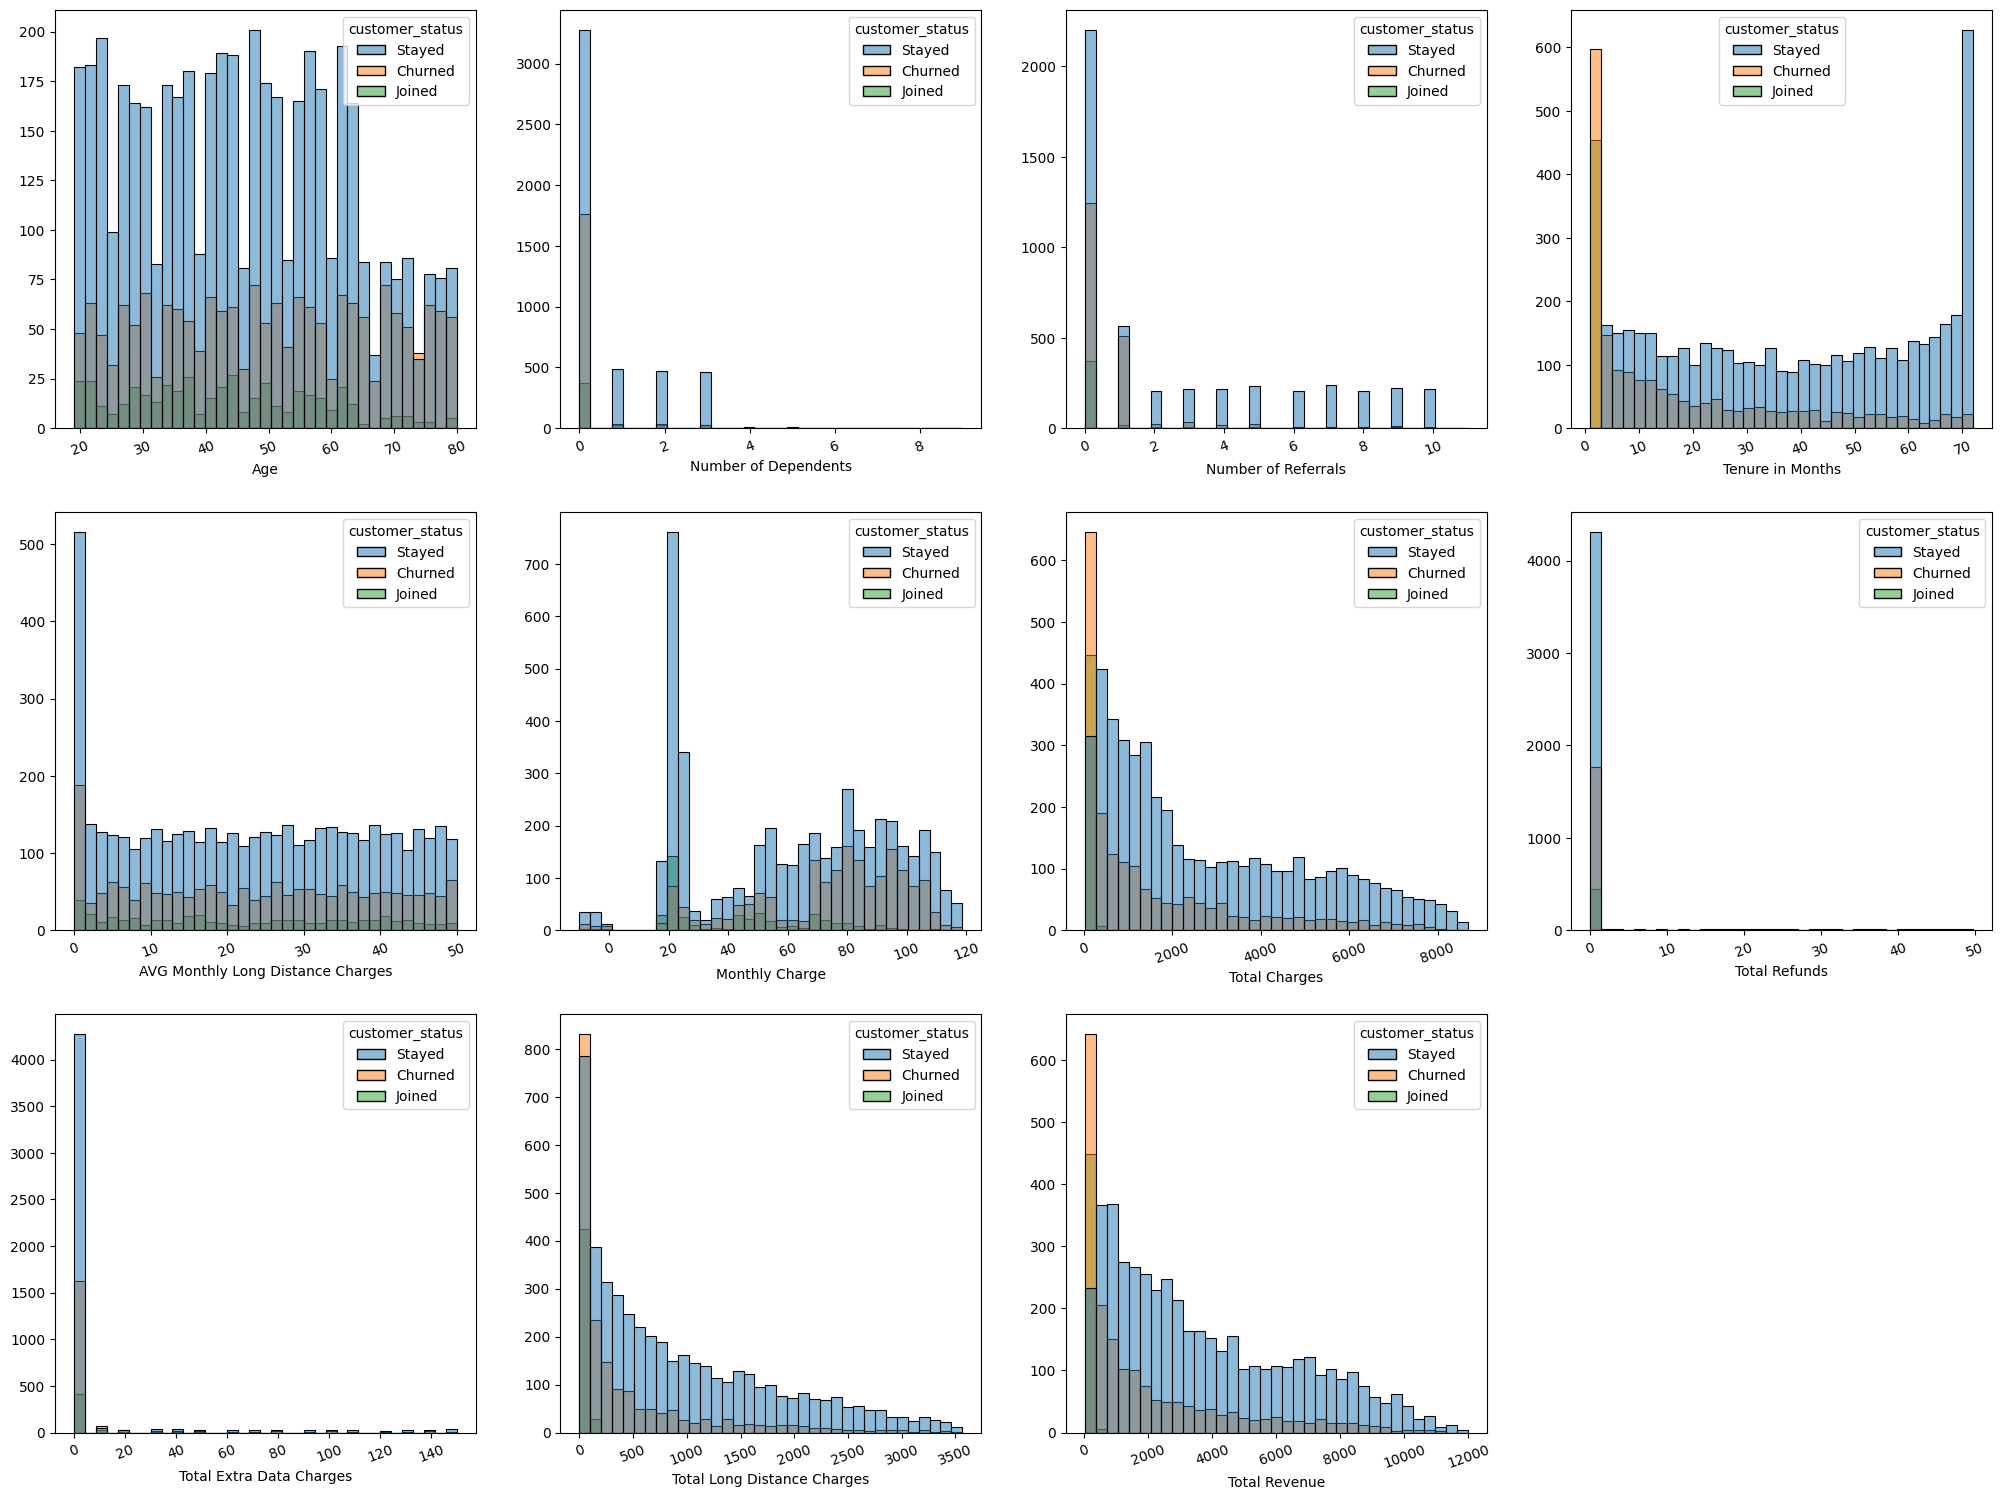

In [8]:
# 4. The profile of each customer category

offercust = ['age','number_of_dependents','number_of_referrals','tenure_in_months',
            'avg_monthly_long_distance_charges','monthly_charge','total_charges','total_refunds','total_extra_data_charges',
            'total_long_distance_charges','total_revenue']
ofctitle = ['Age','Number of Dependents','Number of Referrals','Tenure in Months',
           'AVG Monthly Long Distance Charges','Monthly Charge','Total Charges','Total Refunds','Total Extra Data Charges',
           'Total Long Distance Charges','Total Revenue']
fig = plt.figure(figsize = (25, 25))

for i, (data,title) in enumerate(zip(offercust,ofctitle)):
    plt.subplot(4, 4, i+1)
    ax = sns.histplot(x = churndf[data], hue = churndf['customer_status'], bins = 35)
    ax.set(xlabel = str(title), ylabel = None)
    plt.xticks(rotation = 20)
    i += 1

In [9]:
#5 Find high value customers
revmean = churndf['total_revenue'].mean()

#Create new column high value
churndf['high_value'] = 0

#
churndf.loc[(churndf['total_revenue'] > revmean), 'high_value'] = 'High Value'
churndf['high_value'].value_counts()

0             4281
High Value    2762
Name: high_value, dtype: int64

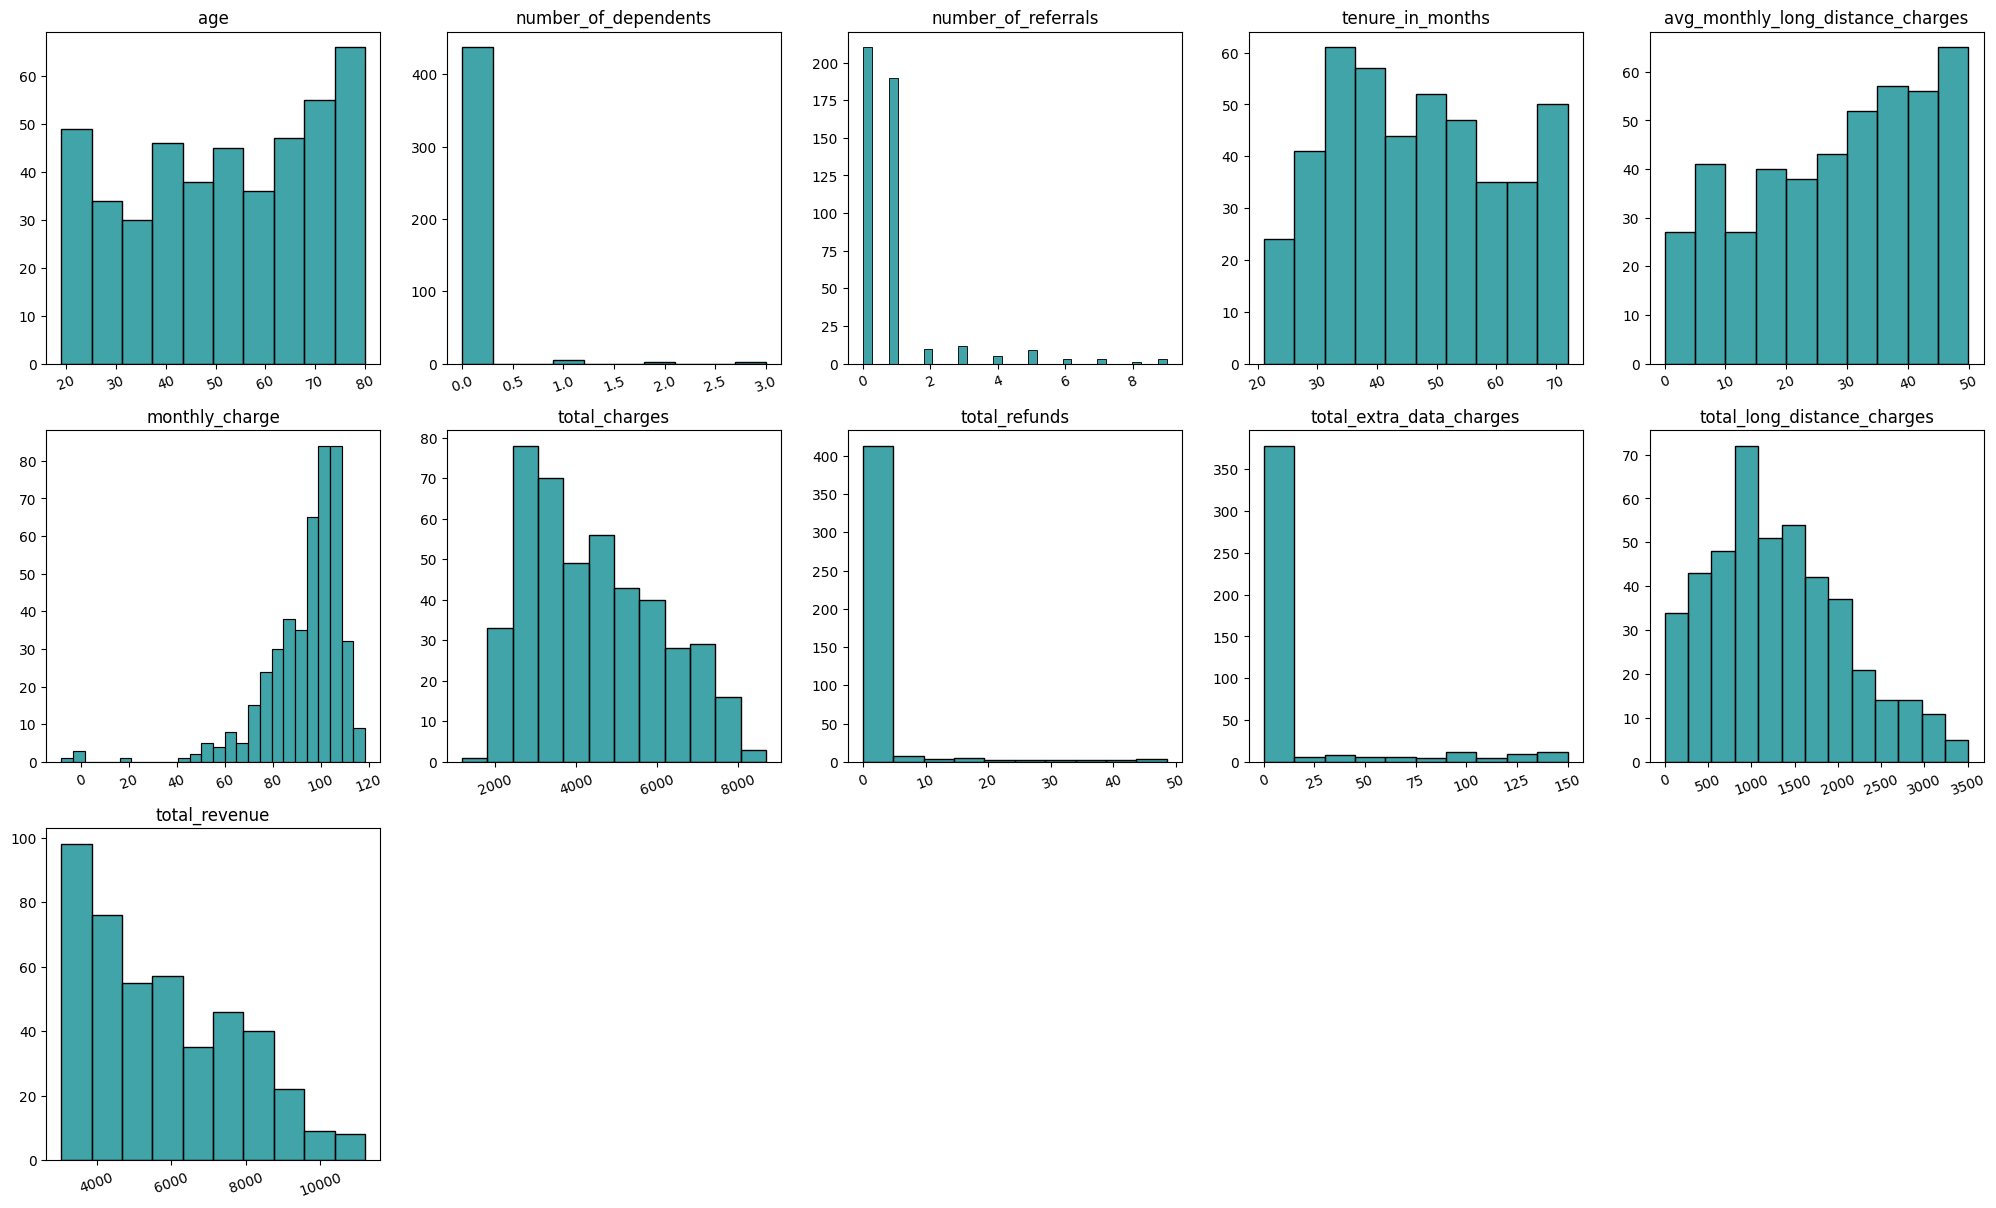

In [10]:
offercust = ['age','number_of_dependents','number_of_referrals','tenure_in_months',
            'avg_monthly_long_distance_charges','monthly_charge','total_charges','total_refunds','total_extra_data_charges',
            'total_long_distance_charges','total_revenue']
#Show High Value and Churned Customers
churnprof = churndf.loc[(churndf['customer_status'] == 'Churned') & (churndf['high_value'] == 'High Value')]

fig = plt.figure(figsize = (25, 25))

i = 1
for n in offercust:
    plt.subplot(5, 5, i)
    ax = sns.histplot(x = churnprof[n], color = '#00868B')
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(n), loc = 'center')
    plt.xticks(rotation = 20, fontsize = 10)
    i += 1

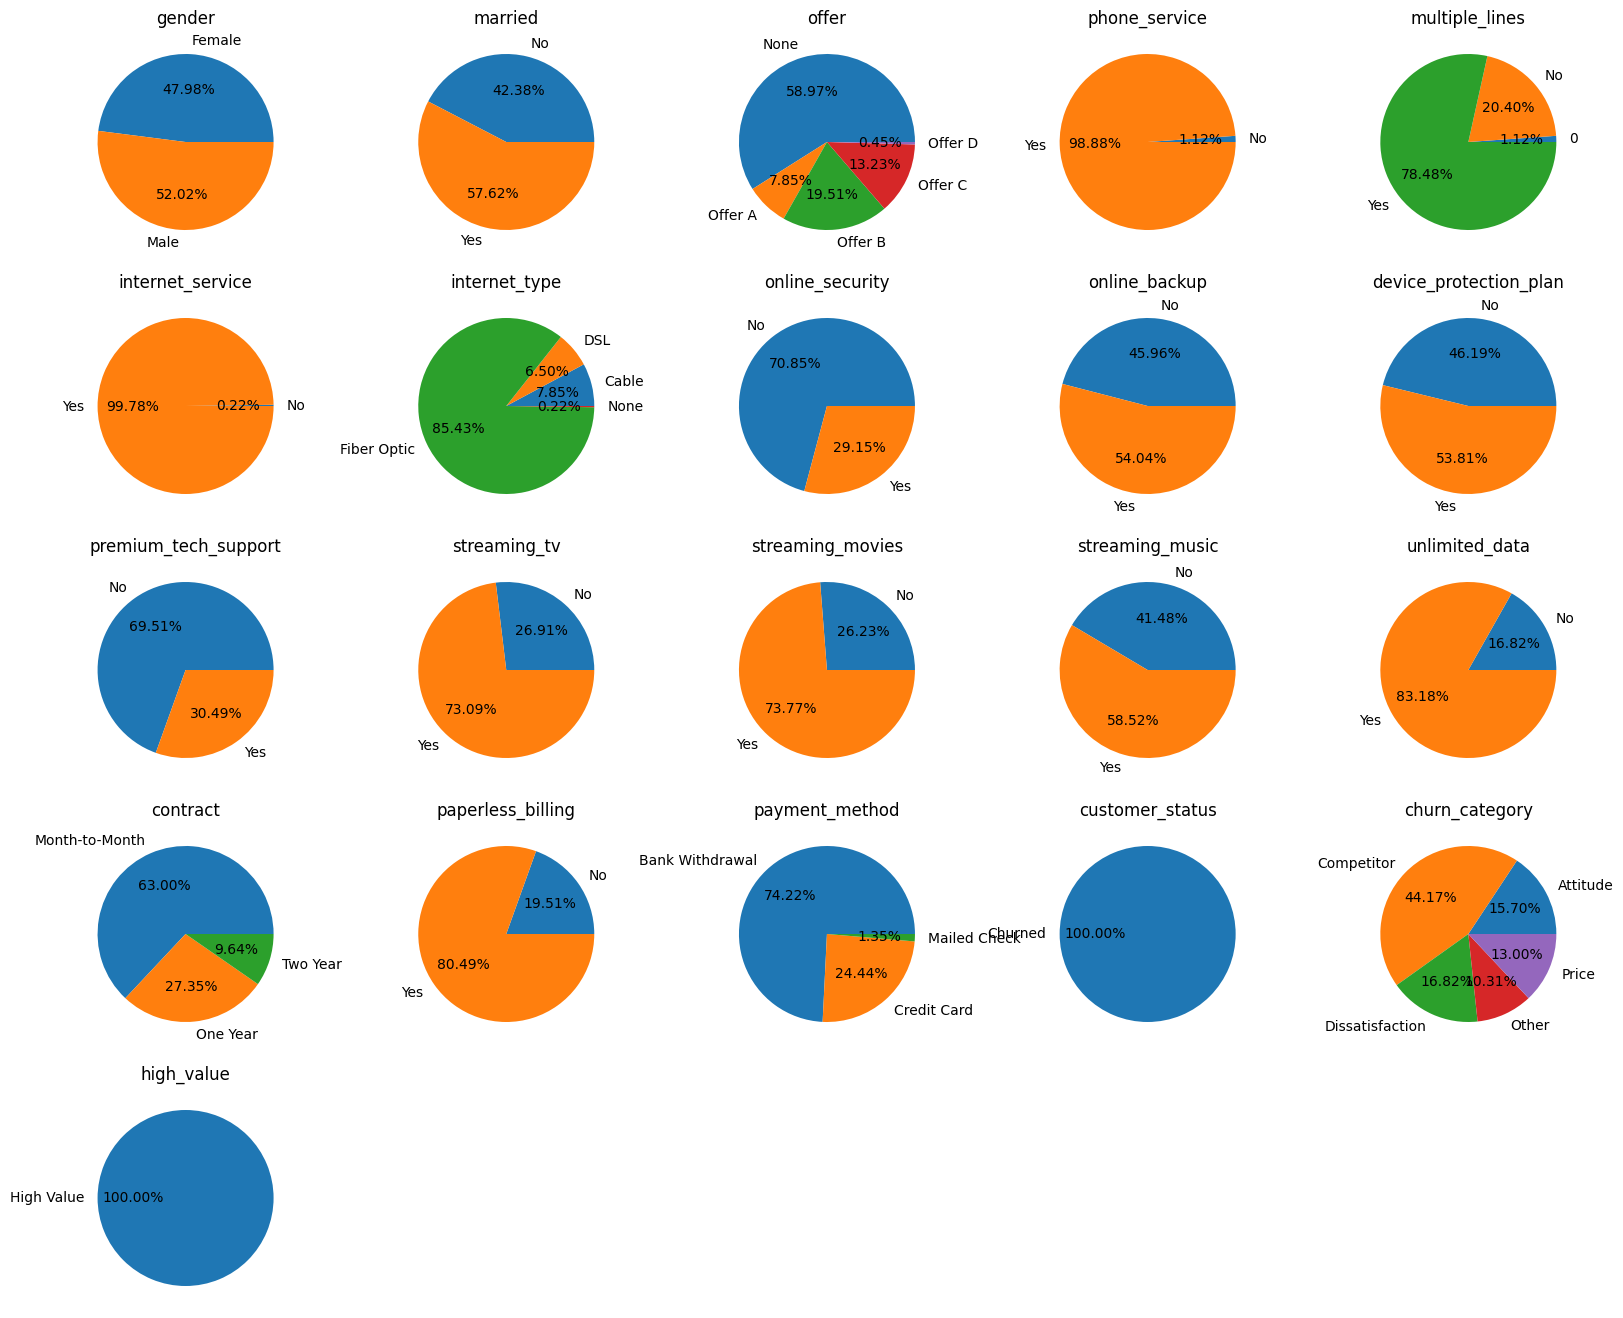

In [11]:
#Profile of Churned High Value customer 
cat = [cname for cname in churnprof.columns if churnprof[cname].nunique() < 10 and churnprof[cname].dtype == "object"]
_ = churnprof[cat]

fig = plt.figure(figsize = (20, 20))

i = 1
for c in _.columns:
    plt.subplot(6, 5, i)
    ax = churnprof.groupby([c]).size().plot(
    kind = 'pie', autopct = '%1.2f%%', labeldistance=1.15)
    explode = (0.05, 0.05, 0.05)
 
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(c), loc='center')
    i += 1